<h1 align="center"> Project 3 Machine Learning with scikit-learn </h1>

---------

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import scikitplot as skplt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [22]:
df = pd.read_csv(r'D:\mypython\Weclouddata\Project 2\ibm-hr-analytics-attrition-dataset\WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

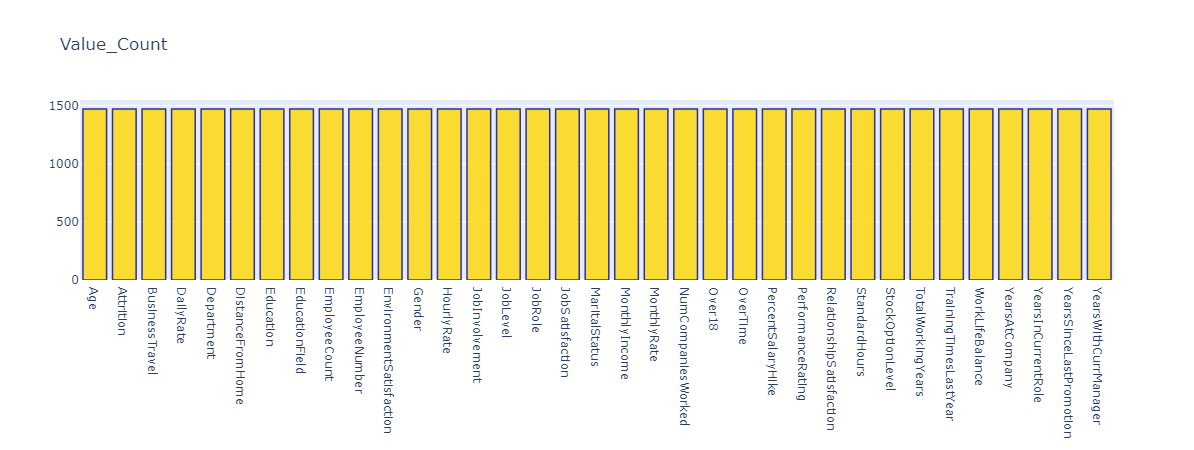

In [24]:
value_count = pd.DataFrame(len(df['Attrition']) - df.isnull().sum(), columns = ['Count'])

trace = go.Bar(x = value_count.index, y = value_count['Count'] ,opacity = 0.8, marker=dict(color = 'gold', line=dict(color='darkblue',width=1.5)))

layout = dict(title = "Value_Count")
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

([<matplotlib.patches.Wedge at 0x2d200032c50>,
 [Text(-1.0493363707830163, 0.5821453263163141, 'No'),
  Text(1.0493363707830163, -0.5821453263163142, 'Yes')],
 [Text(-0.5246681853915082, 0.29107266315815705, '84%'),
  Text(0.5246681853915082, -0.2910726631581571, '16%')])

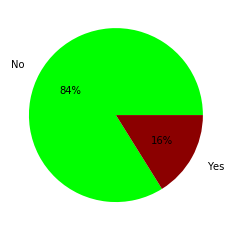

In [25]:
pie=df['Attrition'].value_counts()
plt.pie(pie,labels=pie.index,colors=('lime','darkred',),explode=(0,0), autopct='%1.0f%%',pctdistance=0.6, labeldistance=1.2)

In [26]:
map={'Yes':1,'No':0}
df['Attrition_class']=df['Attrition'].map(map)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_class
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


In [27]:
#numerical
dfn=df[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
#categorical
dfc=df[['BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','Gender','JobInvolvement','JobLevel','JobSatisfaction','MaritalStatus','OverTime','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']]

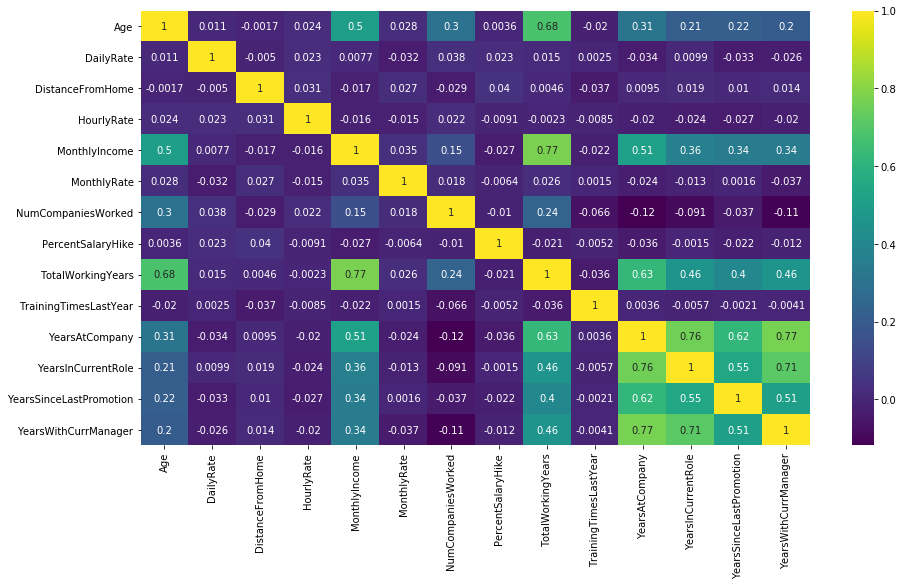

In [28]:
plt.figure(figsize =(15,8))
sns.heatmap(dfn.corr(),annot=True,cmap='viridis')
plt.show()

In [29]:
df_dummy=pd.get_dummies(dfc.astype(str))
df_dummy

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_1,Education_2,Education_3,Education_4,...,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,1,0,0,1,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,0,0,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,1,0,0,1,0,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0
4,0,0,1,0,1,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,0,0,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1466,0,0,1,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1467,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1468,0,1,0,0,0,1,0,0,1,0,...,0,1,1,0,0,0,0,1,0,0


In [30]:
df1=pd.concat([dfn, df_dummy], axis=1)
df1

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,...,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,41,1102,1,94,5993,19479,8,11,8,0,...,0,0,1,0,0,0,1,0,0,0
1,49,279,8,61,5130,24907,1,23,10,3,...,0,1,0,1,0,0,0,0,1,0
2,37,1373,2,92,2090,2396,6,15,7,3,...,0,0,1,0,0,0,0,0,1,0
3,33,1392,3,56,2909,23159,1,11,8,3,...,1,0,1,0,0,0,0,0,1,0
4,27,591,2,40,3468,16632,9,12,6,3,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,41,2571,12290,4,17,17,3,...,1,0,0,1,0,0,0,0,1,0
1466,39,613,6,42,9991,21457,4,15,9,5,...,0,0,0,1,0,0,0,0,1,0
1467,27,155,4,87,6142,5174,1,20,6,0,...,0,0,0,1,0,0,0,0,1,0
1468,49,1023,2,63,5390,13243,2,14,17,3,...,0,1,1,0,0,0,0,1,0,0


In [31]:
X_train, X_test, y_train, y_test = train_test_split(df1, df['Attrition_class'], test_size=0.2, random_state=42)

In [32]:
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train, y_train)
d_tree.score(X_test, y_test)

0.7789115646258503

In [33]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8741496598639455

In [34]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



0.8707482993197279

In [35]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8469387755102041

In [36]:
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



0.8673469387755102

In [37]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [38]:
d_tree1 = DecisionTreeClassifier()
d_tree1.fit(X_train_scaled, y_train)
d_tree1.score(X_test_scaled, y_test)

0.7619047619047619

In [39]:
rf1 = RandomForestClassifier(n_estimators=10)
rf1.fit(X_train_scaled, y_train)
rf1.score(X_test_scaled, y_test)

0.8673469387755102

In [40]:
lr1 = LogisticRegression()
lr1.fit(X_train_scaled, y_train)
lr1.score(X_test_scaled, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



0.891156462585034

In [41]:
knn1 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn1.fit(X_train_scaled, y_train)
knn1.score(X_test_scaled, y_test)

0.8877551020408163

In [42]:
svm1 = SVC()
svm1.fit(X_train_scaled, y_train)
svm1.score(X_test_scaled, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



0.8673469387755102

In [56]:
sm = SMOTE(random_state=18, ratio = 0.3)
x_train_res, y_train_res = sm.fit_sample(X_train_scaled, y_train)

In [57]:
d_tree2 = DecisionTreeClassifier()
d_tree2.fit(x_train_res, y_train_res)
d_tree2.score(X_test_scaled, y_test)

0.8163265306122449

In [58]:
rf2 = RandomForestClassifier(n_estimators=10)
rf2.fit(x_train_res, y_train_res)
rf2.score(X_test_scaled, y_test)

0.8605442176870748

In [59]:
lr2 = LogisticRegression()
lr2.fit(x_train_res, y_train_res)
lr2.score(X_test_scaled, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



0.8877551020408163

In [60]:
knn2 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn2.fit(x_train_res, y_train_res)
knn2.score(X_test_scaled, y_test)

0.8061224489795918

In [61]:
svm2 = SVC()
svm2.fit(x_train_res, y_train_res)
svm2.score(X_test_scaled, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



0.8809523809523809

In [62]:
lr1.coef_

array([[-0.87820936, -0.50469028,  1.21470521,  0.13722227, -1.08251817,
         0.2758382 ,  1.43288102, -0.2406472 , -0.84808744, -0.67282101,
         0.86731206, -1.43445385,  1.59435304, -1.10375654, -0.85062193,
         0.77368726, -0.04790037, -0.09141181, -0.58460068,  0.55117745,
        -0.10359433,  0.12853105,  0.15729609,  0.17027335, -0.4773412 ,
         0.32272046, -0.39040537,  0.00986992, -0.37032013, -0.24011872,
         0.54341879,  0.64879428, -0.16583699, -0.2856728 , -0.32211954,
        -0.28186284,  0.15702779,  1.07471638, -0.01929626, -0.28862945,
        -0.89162572,  0.73974245, -0.86768523,  0.25832145, -0.78830281,
         0.53308909,  0.56506638, -0.16941032,  0.04079819, -0.5612893 ,
        -0.3713907 , -0.11802182,  0.36457748, -1.04432009,  0.91948505,
        -0.04514833, -0.07968671,  0.42087346, -0.27399464, -0.15984766,
        -0.1118662 ,  0.53317818, -0.44735264, -0.34223414,  0.13157355,
         0.55334187,  0.0169705 , -0.47267298, -0.2

In [63]:
feature_importance = abs(lr1.coef_)

print(feature_importance)

[[0.87820936 0.50469028 1.21470521 0.13722227 1.08251817 0.2758382
  1.43288102 0.2406472  0.84808744 0.67282101 0.86731206 1.43445385
  1.59435304 1.10375654 0.85062193 0.77368726 0.04790037 0.09141181
  0.58460068 0.55117745 0.10359433 0.12853105 0.15729609 0.17027335
  0.4773412  0.32272046 0.39040537 0.00986992 0.37032013 0.24011872
  0.54341879 0.64879428 0.16583699 0.2856728  0.32211954 0.28186284
  0.15702779 1.07471638 0.01929626 0.28862945 0.89162572 0.73974245
  0.86768523 0.25832145 0.78830281 0.53308909 0.56506638 0.16941032
  0.04079819 0.5612893  0.3713907  0.11802182 0.36457748 1.04432009
  0.91948505 0.04514833 0.07968671 0.42087346 0.27399464 0.15984766
  0.1118662  0.53317818 0.44735264 0.34223414 0.13157355 0.55334187
  0.0169705  0.47267298 0.22247444]]


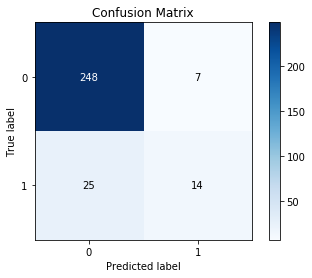

In [52]:
y_pred = lr1.predict(X_test_scaled)
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       255
           1       0.67      0.36      0.47        39

    accuracy                           0.89       294
   macro avg       0.79      0.67      0.70       294
weighted avg       0.88      0.89      0.88       294



In [69]:
scores = cross_val_score(lr1, X_train, y_train, cv=10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sk

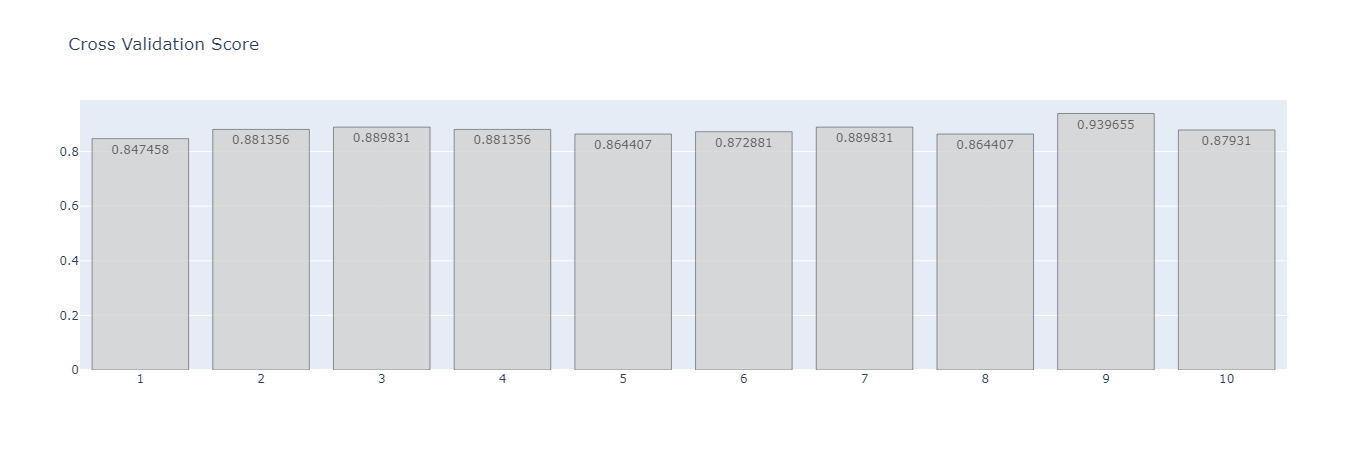

In [106]:
trace = go.Bar(y = scores, x = list(range(1,11)), orientation = 'v',opacity = 0.8, text=scores.round(6), textposition='inside',width=0.8,marker=dict(color = 'lightgrey', line=dict(color='black',width=0.5)))

layout = dict(title = "Cross Validation Score", xaxis = dict(tickmode = 'linear',tick0 = 1,dtick = 1))
                    
fig = dict(data = [trace], layout=layout)

py.iplot(fig)

In [74]:
scores.std()

0.02311091149423441

In [75]:
scores.mean()

0.8810490940970193

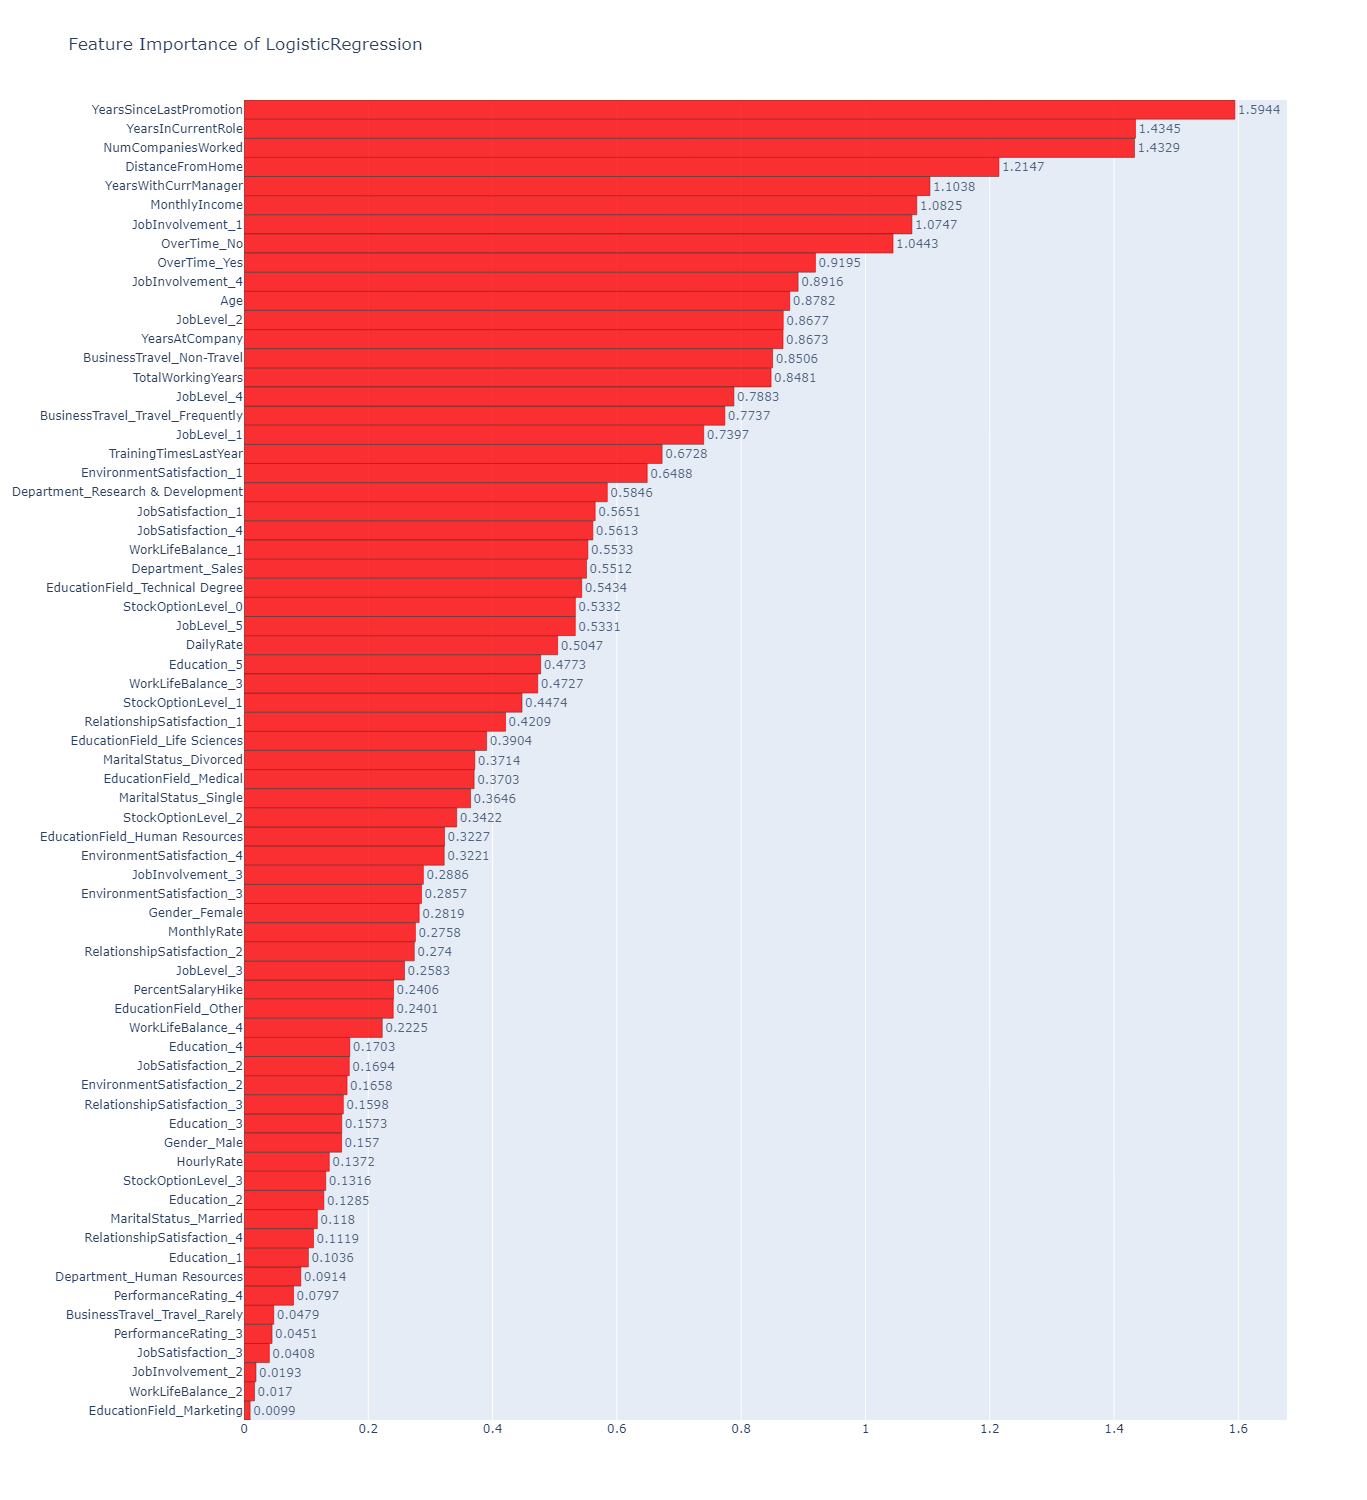

In [91]:
feature_importance = np.abs(lr1.coef_[0])

trace = go.Bar(y = df1.columns, x = feature_importance, orientation = 'h',opacity = 0.8, text=feature_importance.round(4), textposition='outside',width=1,marker=dict(color = 'red', line=dict(color='black',width=0.5)))

layout = dict(autosize=False, width=1100, height=1500,title = "Feature Importance of LogisticRegression", yaxis={'categoryorder':'total ascending', 'automargin':True})
                    
fig = dict(data = [trace], layout=layout)

py.iplot(fig)